In [30]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  0
2.9.1


In [31]:
import pandas as pd   ## data analysis and manipulation
import numpy as np    ## numerial computing
import seaborn as sns ##  data visualization library based on matplotlib
import tensorflow.keras as keras ## main deep learning API

## additional functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import average_precision_score
from tensorflow.keras.utils import to_categorical

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

Load the data, change to your directory

In [33]:
#load the data
df = pd.read_csv("/Users/a123456/Desktop/Fei's Project/Data/OCT_BASELINE_GRI__VF_6-3_FP-15_NO_PHI.csv")
df

,EID,PID,DOB,Eye,ImageID,Scan.Type,Diameter..mm.,Diameter....,Fixed.in.mm,ExamDate,...,VF_EXAM_START,VF_EXAM_END,VF_FOLLOW_UP,VF_N,VF_OCT_BASELINE_DIFF,VF_OCT_FINAL_DIFF,MD_BASELINE,MD_FINAL,VFI_BASELINE,VFI_FINAL
0,1,1,10/24/1949,LE,282596.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,5/11/2017,12/2/2020,3.561944,6,0.000000,3.561944,-2.15,-3.26,98,96
1,2,1,10/24/1949,RE,282593.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,5/11/2017,12/2/2020,3.561944,6,0.000000,3.561944,-7.73,-11.45,82,73
2,3,2,8/7/1939,LE,239514.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,8/26/2014,10/20/2020,6.151951,6,0.000000,6.151951,-1.28,-1.13,98,97
3,4,2,8/7/1939,RE,239512.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,8/26/2014,10/20/2020,6.151951,6,0.000000,6.151951,-0.72,0.60,98,99
4,5,3,5/20/1943,LE,238460.0,OCT Circle Scan,3.5,12.0,0,7/9/2014,...,6/30/2014,10/14/2020,6.291581,10,0.024641,6.266940,-1.69,-0.51,99,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,329,3/22/1952,RE,837.0,OCT Circle Scan,3.7,12.0,0,5/5/2011,...,5/5/2011,12/10/2020,9.601643,17,0.000000,9.601643,0.53,-2.51,98,93
580,581,330,5/15/1945,LE,243095.0,OCT Circle Scan,3.5,12.0,0,12/17/2014,...,12/17/2014,11/25/2020,5.941136,10,0.000000,5.941136,-8.97,-14.71,78,56
581,582,330,5/15/1945,RE,243093.0,OCT Circle Scan,3.7,12.0,0,12/17/2014,...,12/17/2014,11/25/2020,5.941136,9,0.000000,5.941136,-11.39,-11.37,70,67
582,583,331,5/31/1939,LE,109347.0,OCT Circle Scan,3.5,12.0,0,8/13/2013,...,6/11/2013,10/23/2019,6.365503,11,0.172485,6.193018,-3.48,-19.28,97,51


In [34]:
#filter only circle scan data
circle_scan = (df['Scan.Type'] == 'OCT Circle Scan')
df = df[circle_scan]
df.shape

(580, 811)

Removed 4 observations.

In [35]:
df

,EID,PID,DOB,Eye,ImageID,Scan.Type,Diameter..mm.,Diameter....,Fixed.in.mm,ExamDate,...,VF_EXAM_START,VF_EXAM_END,VF_FOLLOW_UP,VF_N,VF_OCT_BASELINE_DIFF,VF_OCT_FINAL_DIFF,MD_BASELINE,MD_FINAL,VFI_BASELINE,VFI_FINAL
0,1,1,10/24/1949,LE,282596.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,5/11/2017,12/2/2020,3.561944,6,0.000000,3.561944,-2.15,-3.26,98,96
1,2,1,10/24/1949,RE,282593.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,5/11/2017,12/2/2020,3.561944,6,0.000000,3.561944,-7.73,-11.45,82,73
2,3,2,8/7/1939,LE,239514.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,8/26/2014,10/20/2020,6.151951,6,0.000000,6.151951,-1.28,-1.13,98,97
3,4,2,8/7/1939,RE,239512.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,8/26/2014,10/20/2020,6.151951,6,0.000000,6.151951,-0.72,0.60,98,99
4,5,3,5/20/1943,LE,238460.0,OCT Circle Scan,3.5,12.0,0,7/9/2014,...,6/30/2014,10/14/2020,6.291581,10,0.024641,6.266940,-1.69,-0.51,99,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,329,3/22/1952,RE,837.0,OCT Circle Scan,3.7,12.0,0,5/5/2011,...,5/5/2011,12/10/2020,9.601643,17,0.000000,9.601643,0.53,-2.51,98,93
580,581,330,5/15/1945,LE,243095.0,OCT Circle Scan,3.5,12.0,0,12/17/2014,...,12/17/2014,11/25/2020,5.941136,10,0.000000,5.941136,-8.97,-14.71,78,56
581,582,330,5/15/1945,RE,243093.0,OCT Circle Scan,3.7,12.0,0,12/17/2014,...,12/17/2014,11/25/2020,5.941136,9,0.000000,5.941136,-11.39,-11.37,70,67
582,583,331,5/31/1939,LE,109347.0,OCT Circle Scan,3.5,12.0,0,8/13/2013,...,6/11/2013,10/23/2019,6.365503,11,0.172485,6.193018,-3.48,-19.28,97,51


Replace NA values in GRI with 0

In [36]:
list(df.columns)

['EID',
 'PID',
 'DOB',
 'Eye',
 'ImageID',
 'Scan.Type',
 'Diameter..mm.',
 'Diameter....',
 'Fixed.in.mm',
 'ExamDate',
 'ExamTime',
 'AQMVersion',
 'Quality',
 'ARTMean',
 'RNFLMean_G',
 'RNFLMean_T',
 'RNFLMean_TS',
 'RNFLMean_TI',
 'RNFLMean_N',
 'RNFLMean_NS',
 'RNFLMean_NI',
 'RNFLClass_G',
 'RNFLClass_T',
 'RNFLClass_TS',
 'RNFLClass_TI',
 'RNFLClass_N',
 'RNFLClass_NS',
 'RNFLClass_NI',
 'RNFLT.1',
 'RNFLT.2',
 'RNFLT.3',
 'RNFLT.4',
 'RNFLT.5',
 'RNFLT.6',
 'RNFLT.7',
 'RNFLT.8',
 'RNFLT.9',
 'RNFLT.10',
 'RNFLT.11',
 'RNFLT.12',
 'RNFLT.13',
 'RNFLT.14',
 'RNFLT.15',
 'RNFLT.16',
 'RNFLT.17',
 'RNFLT.18',
 'RNFLT.19',
 'RNFLT.20',
 'RNFLT.21',
 'RNFLT.22',
 'RNFLT.23',
 'RNFLT.24',
 'RNFLT.25',
 'RNFLT.26',
 'RNFLT.27',
 'RNFLT.28',
 'RNFLT.29',
 'RNFLT.30',
 'RNFLT.31',
 'RNFLT.32',
 'RNFLT.33',
 'RNFLT.34',
 'RNFLT.35',
 'RNFLT.36',
 'RNFLT.37',
 'RNFLT.38',
 'RNFLT.39',
 'RNFLT.40',
 'RNFLT.41',
 'RNFLT.42',
 'RNFLT.43',
 'RNFLT.44',
 'RNFLT.45',
 'RNFLT.46',
 'RNFLT.47',

In [37]:
df['GRI'] = df['GRI'].fillna(0)
df['GRI']

/var/folders/ld/l5hmq0nn6tg8mfw0_3xycn180000gn/T/ipykernel_56678/2630850070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GRI'] = df['GRI'].fillna(0)


0      -3.688171
1      -6.827438
2       0.329429
3       0.581343
4       0.000000
         ...    
579   -11.691467
580   -19.908699
581   -10.130481
582   -24.731627
583   -18.674765
Name: GRI, Length: 580, dtype: float64

Without filtering (here we won't filter it with the following code.)

#filter MD_BASELINE > -12
md_filter = (df['MD_BASELINE'] > -12)
df = df[md_filter]
df.shape

Define binary progression outcome

In [38]:
df_raw = df
y = pd.cut(df.GRI, bins=[-float('inf'), -6, float('inf')], #-6 represents the threshold, i.e. -float to -6: Progressor, -6 to float: Non-Progressor
                  labels=['Progressor','Non-Progressor'], ordered=False)

y

0      Non-Progressor
1          Progressor
2      Non-Progressor
3      Non-Progressor
4      Non-Progressor
            ...      
579        Progressor
580        Progressor
581        Progressor
582        Progressor
583        Progressor
Name: GRI, Length: 580, dtype: category
Categories (2, object): ['Progressor', 'Non-Progressor']

In [39]:
df = df_raw.iloc[:, 28:797] #Only keep the 28th col to 797th col which we are gonna use
df

,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,RNFLT.10,...,RNFLT.760,RNFLT.761,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768,GRI
0,47.0,47.0,46.0,46.0,45.0,45.0,45.0,45.0,45.0,45.0,...,47.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,47.0,-3.688171
1,70.0,71.0,72.0,72.0,73.0,73.0,73.0,73.0,74.0,74.0,...,59.0,60.0,61.0,62.0,63.0,65.0,66.0,67.0,69.0,-6.827438
2,44.0,45.0,45.0,45.0,46.0,47.0,48.0,50.0,51.0,53.0,...,44.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,44.0,0.329429
3,44.0,44.0,44.0,45.0,45.0,46.0,46.0,47.0,47.0,48.0,...,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,0.581343
4,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,46.0,47.0,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,36.0,36.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,100.0,103.0,106.0,108.0,111.0,112.0,113.0,113.0,113.0,112.0,...,82.0,83.0,84.0,86.0,87.0,89.0,92.0,94.0,97.0,-11.691467
580,52.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,...,46.0,47.0,47.0,48.0,48.0,49.0,49.0,50.0,51.0,-19.908699
581,62.0,63.0,64.0,65.0,66.0,67.0,68.0,68.0,68.0,69.0,...,54.0,55.0,56.0,57.0,58.0,58.0,59.0,60.0,61.0,-10.130481
582,47.0,47.0,48.0,48.0,49.0,49.0,50.0,50.0,50.0,51.0,...,47.0,47.0,46.0,46.0,45.0,45.0,46.0,46.0,46.0,-24.731627


In [40]:
#drop missing values
df = df.dropna() #Some observations contain missing values beside the GRI.
print('Numbers of observations containg missing values:', df.isnull().values.sum())
df.shape

Numbers of observations containg missing values: 0


(575, 769)

In [41]:
x = df.iloc[:, 0:768]
print('Numbers of observations containg missing values:', x.isnull().values.sum())
x.head()

Numbers of observations containg missing values: 0


,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,RNFLT.10,...,RNFLT.759,RNFLT.760,RNFLT.761,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768
0,47.0,47.0,46.0,46.0,45.0,45.0,45.0,45.0,45.0,45.0,...,47.0,47.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,47.0
1,70.0,71.0,72.0,72.0,73.0,73.0,73.0,73.0,74.0,74.0,...,58.0,59.0,60.0,61.0,62.0,63.0,65.0,66.0,67.0,69.0
2,44.0,45.0,45.0,45.0,46.0,47.0,48.0,50.0,51.0,53.0,...,44.0,44.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,44.0
3,44.0,44.0,44.0,45.0,45.0,46.0,46.0,47.0,47.0,48.0,...,42.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0
4,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,46.0,47.0,...,36.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,36.0,36.0


In [42]:
x = np.asarray(x)
np.min(x), np.max(x)

(-1.0, 381.0)

In [43]:
x

array([[47., 47., 46., ..., 48., 48., 47.],
       [70., 71., 72., ..., 66., 67., 69.],
       [44., 45., 45., ..., 45., 45., 44.],
       ...,
       [62., 63., 64., ..., 59., 60., 61.],
       [47., 47., 48., ..., 46., 46., 46.],
       [31., 31., 32., ..., 30., 30., 30.]])

In [44]:
scaled_x = x/381
scaled_x

array([[0.12335958, 0.12335958, 0.12073491, ..., 0.12598425, 0.12598425,
        0.12335958],
       [0.18372703, 0.18635171, 0.18897638, ..., 0.17322835, 0.17585302,
        0.18110236],
       [0.11548556, 0.11811024, 0.11811024, ..., 0.11811024, 0.11811024,
        0.11548556],
       ...,
       [0.16272966, 0.16535433, 0.167979  , ..., 0.15485564, 0.15748031,
        0.16010499],
       [0.12335958, 0.12335958, 0.12598425, ..., 0.12073491, 0.12073491,
        0.12073491],
       [0.08136483, 0.08136483, 0.0839895 , ..., 0.07874016, 0.07874016,
        0.07874016]])

Reshape the X matrix ONLY FOR CNN models, do not need to reshape for RF or SVM 

In [45]:
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
#Here we want to reshape the original array (575x768) to a new array (575x768x1), and 'scaled_x.shape[0]' corresponds
#to 575, 'scaled_x.shape[1]' corresponds to 768, and '1' corresponds the third dimension.
scaled_x.shape

(575, 768, 1)

In [46]:
help(np.reshape)

Help on function reshape in module numpy:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the first index
        c

In [47]:
scaled_x

array([[[0.12335958],
        [0.12335958],
        [0.12073491],
        ...,
        [0.12598425],
        [0.12598425],
        [0.12335958]],

       [[0.18372703],
        [0.18635171],
        [0.18897638],
        ...,
        [0.17322835],
        [0.17585302],
        [0.18110236]],

       [[0.11548556],
        [0.11811024],
        [0.11811024],
        ...,
        [0.11811024],
        [0.11811024],
        [0.11548556]],

       ...,

       [[0.16272966],
        [0.16535433],
        [0.167979  ],
        ...,
        [0.15485564],
        [0.15748031],
        [0.16010499]],

       [[0.12335958],
        [0.12335958],
        [0.12598425],
        ...,
        [0.12073491],
        [0.12073491],
        [0.12073491]],

       [[0.08136483],
        [0.08136483],
        [0.0839895 ],
        ...,
        [0.07874016],
        [0.07874016],
        [0.07874016]]])

Use raw RNFL measures

WHY???

#taking averages every 12 measures, rmk 12 * 64=768
for i in range(1,65):
    columns = []
    for j in range(1, 13):
        columns.append('RNFLT.'+ str(j*i))
        scaled_df['Avg.' + str(i)] = scaled_df[columns].mean(axis=1)
scaled_x = scaled_df.iloc[:,768:832]
scaled_x.head()

In [48]:
y = pd.cut(df.GRI, bins=[-float('inf'), -6, float('inf')],
                  labels=['Progressor','Non-Progressor'], ordered=False)
y

0      Non-Progressor
1          Progressor
2      Non-Progressor
3      Non-Progressor
4      Non-Progressor
            ...      
579        Progressor
580        Progressor
581        Progressor
582        Progressor
583        Progressor
Name: GRI, Length: 575, dtype: category
Categories (2, object): ['Progressor', 'Non-Progressor']

In [49]:
#one-hot-encoding our label
y = pd.get_dummies(y)
y.value_counts()

Progressor  Non-Progressor
0           1                 407
1           0                 168
dtype: int64

In [50]:
y

,Progressor,Non-Progressor
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
579,1,0
580,1,0
581,1,0
582,1,0


In [51]:
#8:1:1 training:testing:validation
# set aside 20% of training and testing data for evaluation

#RMK: Here when we divide the data into three parts (training, testing, validating), we ignore that every two obs
#are from the same patient (i.e. the first obs is the left eye of patient 1 and the second obs is the right eye of
#patient 1), so what we need is to design a program that not only divides those data into three parts but also keep
#the two-eyes data of the same patient in the same group. In addition, after splitting, we also need to keep the
#ratio of progressor : nonprogressor = 1: 4.

#Without above condition (random splitting):
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y,
    test_size=0.1, stratify = y, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.11, stratify = y_train, random_state= 8) # 0.11 x 0.9 = 0.1


In [52]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.value_counts(), '\n')
print(y_val.value_counts(), '\n')
print(y_test.value_counts())

(460, 768, 1)
(58, 768, 1)
(57, 768, 1)
Progressor  Non-Progressor
0           1                 326
1           0                 134
dtype: int64 

Progressor  Non-Progressor
0           1                 40
1           0                 17
dtype: int64 

Progressor  Non-Progressor
0           1                 41
1           0                 17
dtype: int64


### An Example CNN Model

In [53]:
#create model1
model_1 = Sequential()

#add layers
model_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
#model_1.add(Dropout(0.5))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Flatten())
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 766, 64)           256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 383, 64)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 381, 32)           6176      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 190, 32)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6080)              0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

## CNN MODELING:

In [55]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=True, callbacks=[early_stopping_monitor])
#Here the author uses 'accuracy' (of the validation set) as the metric (criteria) to find the best model.
#In fact, there also are some other options for the metric.

Epoch 1/500
15/15 [==============================] - 1s 40ms/step - loss: 0.6175 - accuracy: 0.6957 - val_loss: 0.6240 - val_accuracy: 0.7018
Epoch 2/500
15/15 [==============================] - 0s 30ms/step - loss: 0.5971 - accuracy: 0.7087 - val_loss: 0.6166 - val_accuracy: 0.7018
Epoch 3/500
15/15 [==============================] - 0s 29ms/step - loss: 0.5983 - accuracy: 0.7087 - val_loss: 0.6144 - val_accuracy: 0.7018
Epoch 4/500
15/15 [==============================] - 0s 29ms/step - loss: 0.5901 - accuracy: 0.7087 - val_loss: 0.6110 - val_accuracy: 0.7018
Epoch 5/500
15/15 [==============================] - 0s 32ms/step - loss: 0.5887 - accuracy: 0.7087 - val_loss: 0.6083 - val_accuracy: 0.7018
Epoch 6/500
15/15 [==============================] - 0s 30ms/step - loss: 0.5806 - accuracy: 0.7087 - val_loss: 0.6111 - val_accuracy: 0.7018
Epoch 7/500
15/15 [==============================] - 0s 31ms/step - loss: 0.5823 - accuracy: 0.7087 - val_loss: 0.6048 - val_accuracy: 0.7018
Epoch 

In [56]:
m1_eval_test = model_1.evaluate(X_test, y_test)
m1_eval_val = model_1.evaluate(X_val, y_val)

2/2 [==============================] - 0s 10ms/step - loss: 0.6081 - accuracy: 0.7193


In [57]:
pred = model_1.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 9ms/step
roc auc score:  0.5681492109038737
average precision score:  0.5869357042556689


In [58]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

#create model2 (for using the 'loss' as the metric)(loss doesn't work)
model_2 = Sequential()

#add layers
model_2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
#model_2.add(Dropout(0.5))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(2, activation='softmax'))
model_2.summary()

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['loss'])
model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=True, callbacks=[early_stopping_monitor])

### Random Forest Example 

@Sherry, please look up the way to do PCA of the raw RNFL measures and then fit the RF.

In [59]:
scaled_x

array([[[0.12335958],
        [0.12335958],
        [0.12073491],
        ...,
        [0.12598425],
        [0.12598425],
        [0.12335958]],

       [[0.18372703],
        [0.18635171],
        [0.18897638],
        ...,
        [0.17322835],
        [0.17585302],
        [0.18110236]],

       [[0.11548556],
        [0.11811024],
        [0.11811024],
        ...,
        [0.11811024],
        [0.11811024],
        [0.11548556]],

       ...,

       [[0.16272966],
        [0.16535433],
        [0.167979  ],
        ...,
        [0.15485564],
        [0.15748031],
        [0.16010499]],

       [[0.12335958],
        [0.12335958],
        [0.12598425],
        ...,
        [0.12073491],
        [0.12073491],
        [0.12073491]],

       [[0.08136483],
        [0.08136483],
        [0.0839895 ],
        ...,
        [0.07874016],
        [0.07874016],
        [0.07874016]]])

In [60]:
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1])
#Convert this 3-D array (575x768x1) back to the 2-D array (575x768)
scaled_x.shape

(575, 768)

In [61]:
scaled_x

array([[0.12335958, 0.12335958, 0.12073491, ..., 0.12598425, 0.12598425,
        0.12335958],
       [0.18372703, 0.18635171, 0.18897638, ..., 0.17322835, 0.17585302,
        0.18110236],
       [0.11548556, 0.11811024, 0.11811024, ..., 0.11811024, 0.11811024,
        0.11548556],
       ...,
       [0.16272966, 0.16535433, 0.167979  , ..., 0.15485564, 0.15748031,
        0.16010499],
       [0.12335958, 0.12335958, 0.12598425, ..., 0.12073491, 0.12073491,
        0.12073491],
       [0.08136483, 0.08136483, 0.0839895 , ..., 0.07874016, 0.07874016,
        0.07874016]])

In [62]:
y

,Progressor,Non-Progressor
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
579,1,0
580,1,0
581,1,0
582,1,0


For RF and SVM, just do the training / testing split.

In [63]:
#9:1 training:testing
# set aside 20% of train and test data for evaluation
#Random splitting
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y,
    test_size=0.1, stratify = y, random_state = 8)



In [64]:
print(X_train.shape)
X_train

(517, 768)


array([[0.12073491, 0.12073491, 0.11811024, ..., 0.12073491, 0.12073491,
        0.12073491],
       [0.17585302, 0.17585302, 0.17585302, ..., 0.17060367, 0.17322835,
        0.17322835],
       [0.14435696, 0.14698163, 0.14698163, ..., 0.14173228, 0.14435696,
        0.14435696],
       ...,
       [0.17847769, 0.17847769, 0.17847769, ..., 0.17847769, 0.17847769,
        0.17847769],
       [0.12073491, 0.12335958, 0.12335958, ..., 0.12335958, 0.12335958,
        0.12073491],
       [0.1023622 , 0.10498688, 0.10761155, ..., 0.09973753, 0.09973753,
        0.1023622 ]])

In [65]:
print(y_train.shape)
y_train

(517, 2)


,Progressor,Non-Progressor
67,0,1
539,0,1
231,1,0
156,0,1
311,0,1
...,...,...
91,1,0
75,0,1
284,1,0
79,0,1


In [66]:
print(X_test.shape)
X_test

(58, 768)


array([[0.13648294, 0.13648294, 0.13910761, ..., 0.17060367, 0.17060367,
        0.17322835],
       [0.12598425, 0.12598425, 0.12598425, ..., 0.12335958, 0.12335958,
        0.12598425],
       [0.14435696, 0.14435696, 0.14435696, ..., 0.14435696, 0.14435696,
        0.14435696],
       ...,
       [0.13648294, 0.13648294, 0.13910761, ..., 0.1312336 , 0.13385827,
        0.13385827],
       [0.13910761, 0.13910761, 0.13910761, ..., 0.13385827, 0.13648294,
        0.13648294],
       [0.08661417, 0.08923885, 0.09186352, ..., 0.0839895 , 0.08661417,
        0.08661417]])

In [67]:
print(y_test.shape)
y_test

(58, 2)


,Progressor,Non-Progressor
64,1,0
428,0,1
114,0,1
10,0,1
137,0,1
313,1,0
256,0,1
489,0,1
68,0,1
403,1,0


In [68]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [69]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, 
                            oob_score = True,
                            random_state = 32)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=32)

In [70]:
from sklearn.ensemble import RandomForestClassifier
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [71]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.6551724137931034


In [72]:
# Probabilities for each class
rf_probs = rf.predict_proba(X_test)[:1]

#RMK:'rf.predict_proba' will return the probability of each options for each class. Here we should notice that
#there are two classes for 'y_test' (progressor vs nonprogressor), and for each class, there are two options 
#(0 vs 1)
#So here returning the predicted prob for one class (progressor) is enough. '[:1]' means we want the col < 1, i.e.
#col = 0, which is the first column, corresponding to the probability for 'progressor' class.

#RMK2: In each cell, we can see there are two numbers (for eg: 1st is [0.518, 0.482]), the first number (0.518) is
#the predicted prob of option '0', while the second number (0.482) is the predicted prob of option '1' for the
#'progressor' class. Since 0.518 > 0.482, we should consider the predicted result for first patient is likely to 
#be a nonprogressor.

rf_probs[0]

array([[0.518, 0.482],
       [0.566, 0.434],
       [0.896, 0.104],
       [0.929, 0.071],
       [0.925, 0.075],
       [0.707, 0.293],
       [0.818, 0.182],
       [0.601, 0.399],
       [0.737, 0.263],
       [0.951, 0.049],
       [0.522, 0.478],
       [0.893, 0.107],
       [0.806, 0.194],
       [0.575, 0.425],
       [0.916, 0.084],
       [0.63 , 0.37 ],
       [0.626, 0.374],
       [0.893, 0.107],
       [0.588, 0.412],
       [0.643, 0.357],
       [0.693, 0.307],
       [0.569, 0.431],
       [0.595, 0.405],
       [0.51 , 0.49 ],
       [0.768, 0.232],
       [0.732, 0.268],
       [0.646, 0.354],
       [0.833, 0.167],
       [0.55 , 0.45 ],
       [0.861, 0.139],
       [0.564, 0.436],
       [0.901, 0.099],
       [0.559, 0.441],
       [0.922, 0.078],
       [0.739, 0.261],
       [0.591, 0.409],
       [0.622, 0.378],
       [0.897, 0.103],
       [0.744, 0.256],
       [0.523, 0.477],
       [0.806, 0.194],
       [0.775, 0.225],
       [0.605, 0.395],
       [0.7

In [73]:
len(rf_probs[0])
#58 is the number of obs in test group.

58

In [74]:
#Full returning result of 'rf.predict_proba', we can see the second array is just the reverse of first array.
p = rf.predict_proba(X_test)
p

[array([[0.518, 0.482],
        [0.566, 0.434],
        [0.896, 0.104],
        [0.929, 0.071],
        [0.925, 0.075],
        [0.707, 0.293],
        [0.818, 0.182],
        [0.601, 0.399],
        [0.737, 0.263],
        [0.951, 0.049],
        [0.522, 0.478],
        [0.893, 0.107],
        [0.806, 0.194],
        [0.575, 0.425],
        [0.916, 0.084],
        [0.63 , 0.37 ],
        [0.626, 0.374],
        [0.893, 0.107],
        [0.588, 0.412],
        [0.643, 0.357],
        [0.693, 0.307],
        [0.569, 0.431],
        [0.595, 0.405],
        [0.51 , 0.49 ],
        [0.768, 0.232],
        [0.732, 0.268],
        [0.646, 0.354],
        [0.833, 0.167],
        [0.55 , 0.45 ],
        [0.861, 0.139],
        [0.564, 0.436],
        [0.901, 0.099],
        [0.559, 0.441],
        [0.922, 0.078],
        [0.739, 0.261],
        [0.591, 0.409],
        [0.622, 0.378],
        [0.897, 0.103],
        [0.744, 0.256],
        [0.523, 0.477],
        [0.806, 0.194],
        [0.775, 

In [75]:
help(RandomForestClassifier.predict_proba)

Help on function predict_proba in module sklearn.ensemble._forest:

predict_proba(self, X)
    Predict class probabilities for X.
    
    The predicted class probabilities of an input sample are computed as
    the mean predicted class probabilities of the trees in the forest.
    The class probability of a single tree is the fraction of samples of
    the same class in a leaf.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The input samples. Internally, its dtype will be converted to
        ``dtype=np.float32``. If a sparse matrix is provided, it will be
        converted into a sparse ``csr_matrix``.
    
    Returns
    -------
    p : ndarray of shape (n_samples, n_classes), or a list of such arrays
        The class probabilities of the input samples. The order of the
        classes corresponds to that in the attribute :term:`classes_`.



In [76]:
rf.oob_score_

0.6827852998065764

In [77]:
# Calculate roc auc
roc_value = roc_auc_score(y_test, predictions)
ap_score = average_precision_score(y_test, predictions)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

roc auc score:  0.4634146341463415
average precision score:  0.49259117669546604


### Support Vector Machines Example

@Kara, two tuning parameters in SVM are `kernel` and `C`.

In [78]:
y_train_1d = y_train.drop(columns='Non-Progressor')
y_train_1d

,Progressor
67,0
539,0
231,1
156,0
311,0
...,...
91,1
75,0
284,1
79,0


In [79]:
y_train_1d = y_train_1d.values.ravel() #'ravel()' is used to flatten the multi-dimensional array to a 1-D array.
y_train_1d

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [80]:
y_test_1d = y_test.drop(columns='Non-Progressor')
y_test_1d = y_test_1d.values.ravel()

In [81]:
from sklearn import svm
#Create a svm Classifier
svc_m1 = svm.SVC(kernel='rbf', C=10) # Radial Kernel
# most commonly use SVC = support vector classifier = includes linear and nonlinear kernels
# linear, radial, poly kernel 
# larger C = larger cost on misclassification 
# smaller C = training data fit better but generalization / performance in test is worse

#Train the model using the training sets
svc_m1.fit(X_train, y_train_1d)

SVC(C=10)

In [82]:
help(svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [83]:
#Predict the response for test dataset
svm_y_pred = svc_m1.predict(X_test)
svm_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [97]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test_1d, svm_y_pred))
#(True positive + true negative)/(false positive + false negative)

# Model Precision: what percentage of predicted progressors are real?
print("Precision:", metrics.precision_score(y_test_1d, svm_y_pred))
# True positive / (True positive + False positive) i.e. 4/(4+6)
# precision = true positive = sensitivity

# Model Recall: what percentage of real progressors are truly predicted?
print("Recall:", metrics.recall_score(y_test_1d, svm_y_pred))
#tp/(tp+fn) i.e. 4/(4+13)

print('\n')
# also look at confusion matrix
print('Number of real progressors:', sum(y_test_1d))
print('Number of predicted progressors:', sum(svm_y_pred))
confusionMat = [['TN', 'FP'], ['FN', 'TP']]
confusionMat = np.reshape(confusionMat, (2, 2))
print(confusionMat)
metrics.confusion_matrix(y_test_1d, svm_y_pred)




Accuracy: 0.6724137931034483
Precision: 0.4
Recall: 0.23529411764705882


Number of real progressors: 17
Number of predicted progressors: 10
[['TN' 'FP']
 ['FN' 'TP']]


array([[35,  6],
       [13,  4]])

In [86]:
help(metrics.accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, default=True
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Ret

In [87]:
help(metrics.recall_score)

Help on function recall_score in module sklearn.metrics._classification:

recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the recall.
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like, default=None
        The set of labels to include when ``average != 'binary'``, and their
        ord

## Random Search for Model Tuning

@Yanlong

In [50]:
def build_model(hp):
    # create model object
    model = keras.Sequential([
    #adding first convolutional layer    
    keras.layers.Conv1D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(768,1)
    ),
    keras.layers.MaxPooling1D(
        pool_size= hp.Choice('pool_size',values = [2,5,8])
    ),
    keras.layers.Dropout(0.5),
    # adding second convolutional layer 
    keras.layers.Conv1D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=16, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    keras.layers.MaxPooling1D(
        pool_size= 2
    ),
    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=16, max_value=128, step=16),
        activation='relu'
    ),
    # output layer    
    keras.layers.Dense(2, activation='softmax')
    ])
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [55]:
#importing random search
#from keras_tuner import RandomSearch
import keras_tuner as kt
from tensorflow import keras
#creating randomsearch object
tuner = kt.RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials = 100)#Original is 50
# search best parameter
tuner.search(X_train,y_train,epochs=100,validation_data=(X_val,y_val))

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [44]:
model=tuner.get_best_models(num_models=1)[0]
#summary of best model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 766, 80)           320       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 383, 80)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 383, 80)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 381, 32)           7712      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 190, 32)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 6080)              0

In [46]:
pred = model.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 17ms/step
roc auc score:  0.4863701578192252
average precision score:  0.5126152635152574


In [48]:
mbest_eval_test = model.evaluate(X_test, y_test)
mbest_eval_val = model.evaluate(X_val, y_val)

2/2 [==============================] - 0s 14ms/step - loss: 0.8881 - accuracy: 0.7895


In [49]:
pred = model.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 10ms/step
roc auc score:  0.4863701578192252
average precision score:  0.5126152635152574


Save the best model

In [47]:
filename = 'CNN_GRI_' + str(x.shape[0]) + '_roc_value=' + roc_value + '_ap_score=' + ap_score + '.h5'
filename

TypeError: can only concatenate str (not "numpy.float64") to str

In [33]:
model.save(filename)

INFO:tensorflow:Assets written to: model/assets


In [56]:
y_pred = model.predict(X_test)
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 10ms/step


3/3 [==============================] - 0s 11ms/step - loss: 2.3663 - accuracy: 0.7432


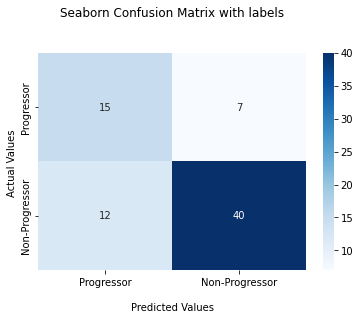

In [43]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Progressor','Non-Progressor'])
ax.yaxis.set_ticklabels(['Progressor','Non-Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('/Users/alvin/Documents/SP22/Fei/GRI_test.png')
m1_eval_test = model.evaluate(X_test, y_test)
plt.show()

## Grid Search for Model Tuning

@Sherry, @Kara

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
# Take a look at current model hyper parameters
print(svc_m1._gamma) # 1 / (n_features * X.var())
svc_m1.get_params()

0.1322677742053997


{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [100]:
svc_param_grid = {'C': [1, 4, 6, 8, 10, 20], 'kernel': ['linear', 'rbf', 'poly'], 
                 'gamma': ['scale', 'auto', 0.01, 0.1, 0.25]}
# gamma from scale is 0.5852071349905691
# gamma from auto = 1/n = 0.001
svm_mod_search_all = svm.SVC() #Create an empty SVC() class.
svc_grid = GridSearchCV(svm_mod_search_all, svc_param_grid)
svc_grid.fit(X_train, y_train_1d)
print(svc_grid.best_params_)

{'C': 20, 'gamma': 0.01, 'kernel': 'rbf'}


In [101]:
svc_optimized = svm.SVC(kernel='rbf', C=20, gamma = 0.01)
svc_optimized.fit(X_train, y_train_1d)

SVC(C=20, gamma=0.01)

In [102]:
svc_optimized_pred = svc_optimized.predict(X_test)
svc_optimized_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [103]:
print("Accuracy:",metrics.accuracy_score(y_test_1d, svc_optimized_pred))
print("True Positives:",metrics.precision_score(y_test_1d, svc_optimized_pred))
print("True Negatives:",metrics.recall_score(y_test_1d, svc_optimized_pred))
metrics.confusion_matrix(y_test_1d, svc_optimized_pred)

Accuracy: 0.7068965517241379
True Positives: 0.0
True Negatives: 0.0


/Users/a123456/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[41,  0],
       [17,  0]])

The grid search optimal parameters may not give you the best performance on the test data, needs more investigation.